# $$
\text{TP N°2. Approximation polynomiale.}
$$

Nous cherchons à illustrer le phénomène de Runge pour l'interpolation polynomiale de Lagrange.

1.a. Définir une fonction _Base_ qui prend en entrée un entier $0 \leq j \leq N$, une liste de coefficients $X = [x_0, \ldots, x_N]$ et un nombre réel $x$, et renvoie la valeur au point $x$ du polynôme :
$$
\ell_j(X) = \prod_{1 \leq k \neq j \leq N} \, \frac{X - x_k}{x_j - x_k}.
$$

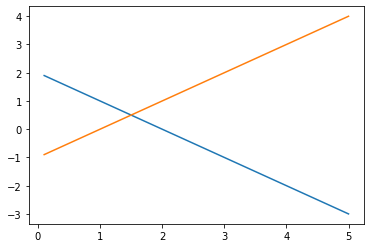

In [1]:
from matplotlib.pyplot import *
from numpy import *

def Base(j, X, x):
    l = 1
    for k in range(0, len(X)):
        if k != j:
            l = l * (x - X[k])/(X[j] - X[k])
    return l

# Test de la fonction Base avec des fonctions affines

X = [1, 2]
A = linspace(0.1,5,100)
B = []
C = []
for x in A:
    B.append(Base(0, X, x))
    C.append(Base(1, X, x))
plot(A, B)
plot(A, C)
show()

b. Définir une fonction _Lagrange_ qui prend en entrée une fonction de la variable réelle $f$, une liste de coefficients $X = [x_0, \ldots, x_N]$ et un nombre réel $x$, et renvoie la valeur au point $x$ du polynôme d'interpolation de Lagrange $P_f(X)$ aux points $x_0$, $\ldots$, et $x_N$ :
$$
P_f(X) = \sum_{j = 0}^N f(x_j) \, \ell_j(X).
$$

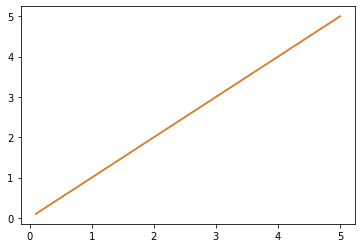

In [2]:
def Lagrange(f, X, x):
    P = 0
    for k in range(0, len(X)):
        P = P + f(X[k]) * Base(k, X, x)
    return P

# Test de la fonction Lagrange avec une fonction affine

def g(x):
    return x
G = g(A)
Q = []
for x in A:
    Q.append(Lagrange(g, X, x))
plot(A, G)
plot(A, Q)
show()

2.a. Définir une fonction _Repartie_ qui prend en entrée un entier $N \geq 0$, et renvoie la liste des $N + 1$ points équirépartis dans le segment $[- 1, 1]$.

In [3]:
def Repartie(N):
    return linspace(-1, 1, N)

# Test de la fonction Repartie pour N = 5

print("Repartie(5) =",Repartie(5),"\n")

Repartie(5) = [-1.  -0.5  0.   0.5  1. ] 



b. Soit
$$
\forall x \in \mathbb{R}, \, f(x) = \frac{1}{1 + 5 x^2}.
$$
À l'aide de la fonction _Lagrange_, tracer sur le segment $[- 1, 1]$ les courbes représentatives de la fonction $f$ et de son polynôme d'interpolation de Lagrange aux $11$ points équirépartis du segment $[- 1, 1]$.

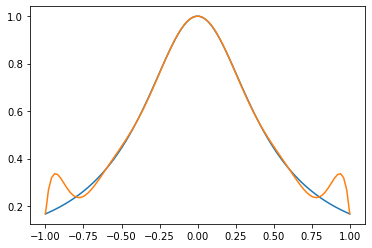

In [4]:
def f(x):
    return 1/(1 + 5*x**2)
E = linspace(-1, 1, 100)
F = f(E)
P1 = []
for x in E:
    P1.append(Lagrange(f, Repartie(11), x))
plot(E, F)
plot(E, P1)
show()

c. Définir une fonction _Tchebychev_ qui prend en entrée un entier $N \geq 0$, et renvoie la liste des $N + 1$ points de Tchebychev du segment $[-1, 1]$ :
$$
\forall 0 \leq j \leq N, \, t_j^N = \cos \Big( \frac{(2 j + 1) \pi}{2 N + 2} \Big).
$$

In [5]:
def Tchebychev(N):
    T = []
    for i in range(0, N + 1):
        T.append(cos(((2 * i + 1) *pi)/(2 * N + 2)))
    return T

# Test de la fonction Tchebychev pour N = 2

print("Tchebychev(2) =",Tchebychev(2),"\n")

Tchebychev(2) = [0.8660254037844387, 6.123233995736766e-17, -0.8660254037844387] 



d. Compléter le tracé de la question 2.b avec le tracé, à l'aide de la fonction _Lagrange_, de la courbe représentative du polynôme d'interpolation de Lagrange de la fonction $f$ aux $11$ points de Tchebychev du segment $[- 1, 1]$.

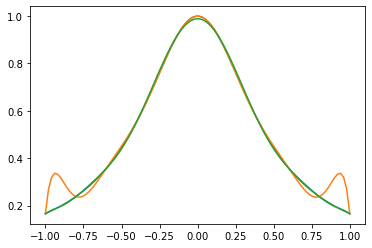

In [6]:
P2 = []
for y in E:
    P2.append(Lagrange(f, Tchebychev(11), y))
plot(E, F)
plot(E, P1)
plot(E, P2)
show()

3.a. Considérons la valeur absolue
$$
\forall x \in \mathbb{R}, \, g(x) = |x|.
$$
À l'aide de la fonction _Lagrange_, tracer sur le segment $[- 1, 1]$ les courbes représentatives de la fonction $g$, et de ses polynômes d'interpolation de Lagrange aux $11$ points équirépartis, puis aux $11$ points de Tchebychev, du segment $[- 1, 1]$.

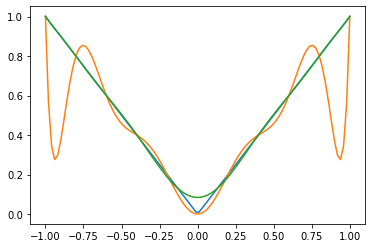

In [7]:
def g(x):
    return abs(x)
G = []
Q1 = []
Q2 = []
for x in E:
    G.append(g(x))
    Q1.append(Lagrange(g, Repartie(11), x))
    Q2.append(Lagrange(g, Tchebychev(11), x))
plot(E, G)
plot(E, Q1)
plot(E, Q2)
show()

b. Considérons la fonction de Heaviside
$$
\forall x \in \mathbb{R}, \, h(x) = \begin{cases} 1, \text{ si } x > 0, \\ \frac{1}{2}, \text{ si } x = 0, \\ 0, \text{ si } x < 0. \end{cases}
$$
À l'aide de la fonction _Lagrange_, tracer sur le segment $[- 1, 1]$ les courbes représentatives de la fonction $h$, et de ses polynômes d'interpolation de Lagrange aux $11$ points équirépartis, puis aux $11$ points de Tchebychev, du segment $[- 1, 1]$. 

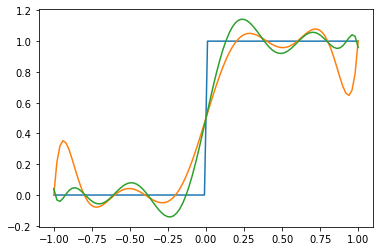

In [8]:
def h(x):
    if x > 0:
        return 1
    else:
        if x == 0:
            return 0.5
        else:
            return 0
H = []
R1 = []
R2 = []
for x in E:
    H.append(h(x))
    R1.append(Lagrange(h, Repartie(11), x))
    R2.append(Lagrange(h, Tchebychev(11), x))
plot(E, H)
plot(E, R1)
plot(E, R2)
show()